In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset=("C:/Users/ACER/Desktop/machine learning/house_price.csv")
df = pd.read_csv(dataset)
df

,,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


In [6]:
#mean function
df.price_per_sqft.mean()

7920.336742424242

In [9]:
# Percentile 
percentile_25 = df['price_per_sqft'].quantile(0.25)
percentile_50 = df['price_per_sqft'].quantile(0.50)
percentile_75 = df['price_per_sqft'].quantile(0.75)
percentile_25,percentile_50,percentile_75

(4267.0, 5438.0, 7317.0)

In [11]:
# Detect and remove outliers using IQR
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
IQR


2437.0

In [13]:
# IQR (Interquartile Range) method
iqr_price_per_sqft = percentile_75 - percentile_25
iqr_price_per_sqft

3050.0

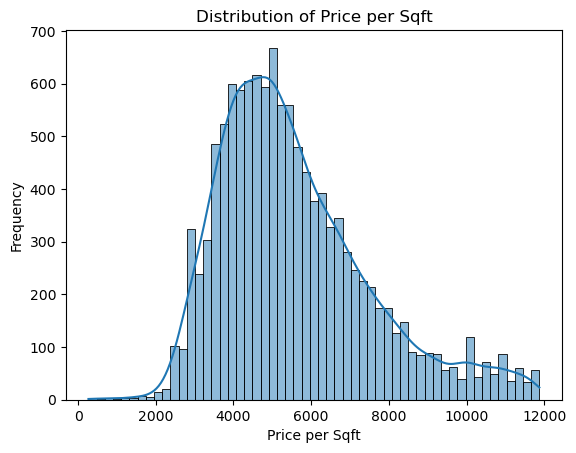

In [14]:
#NORMAL DISTRIBUTION
sns.histplot(df['price_per_sqft'], kde=True)
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.title('Distribution of Price per Sqft')
plt.show()

In [16]:

non_numeric_values = df['price_per_sqft'][pd.to_numeric(df['price_per_sqft'], errors='coerce').isna()]
non_numeric_values

Series([], Name: price_per_sqft, dtype: int64)

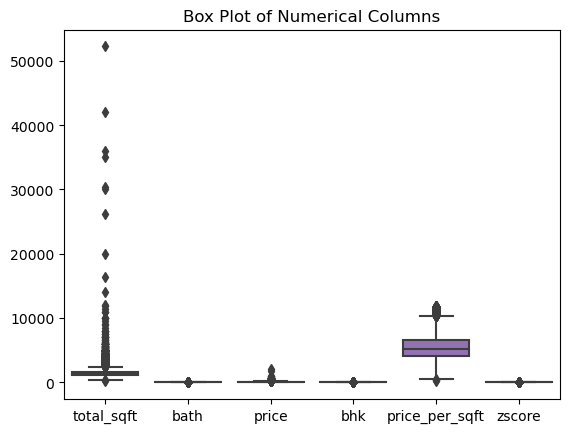

In [17]:
# Box plot for all numerical columns
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Box Plot of Numerical Columns')
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_13548\3695935331.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


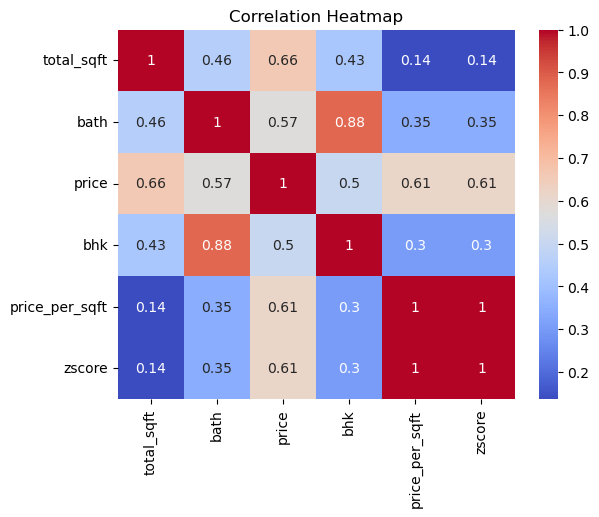

In [19]:
#Correlation between all numerical columns and heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

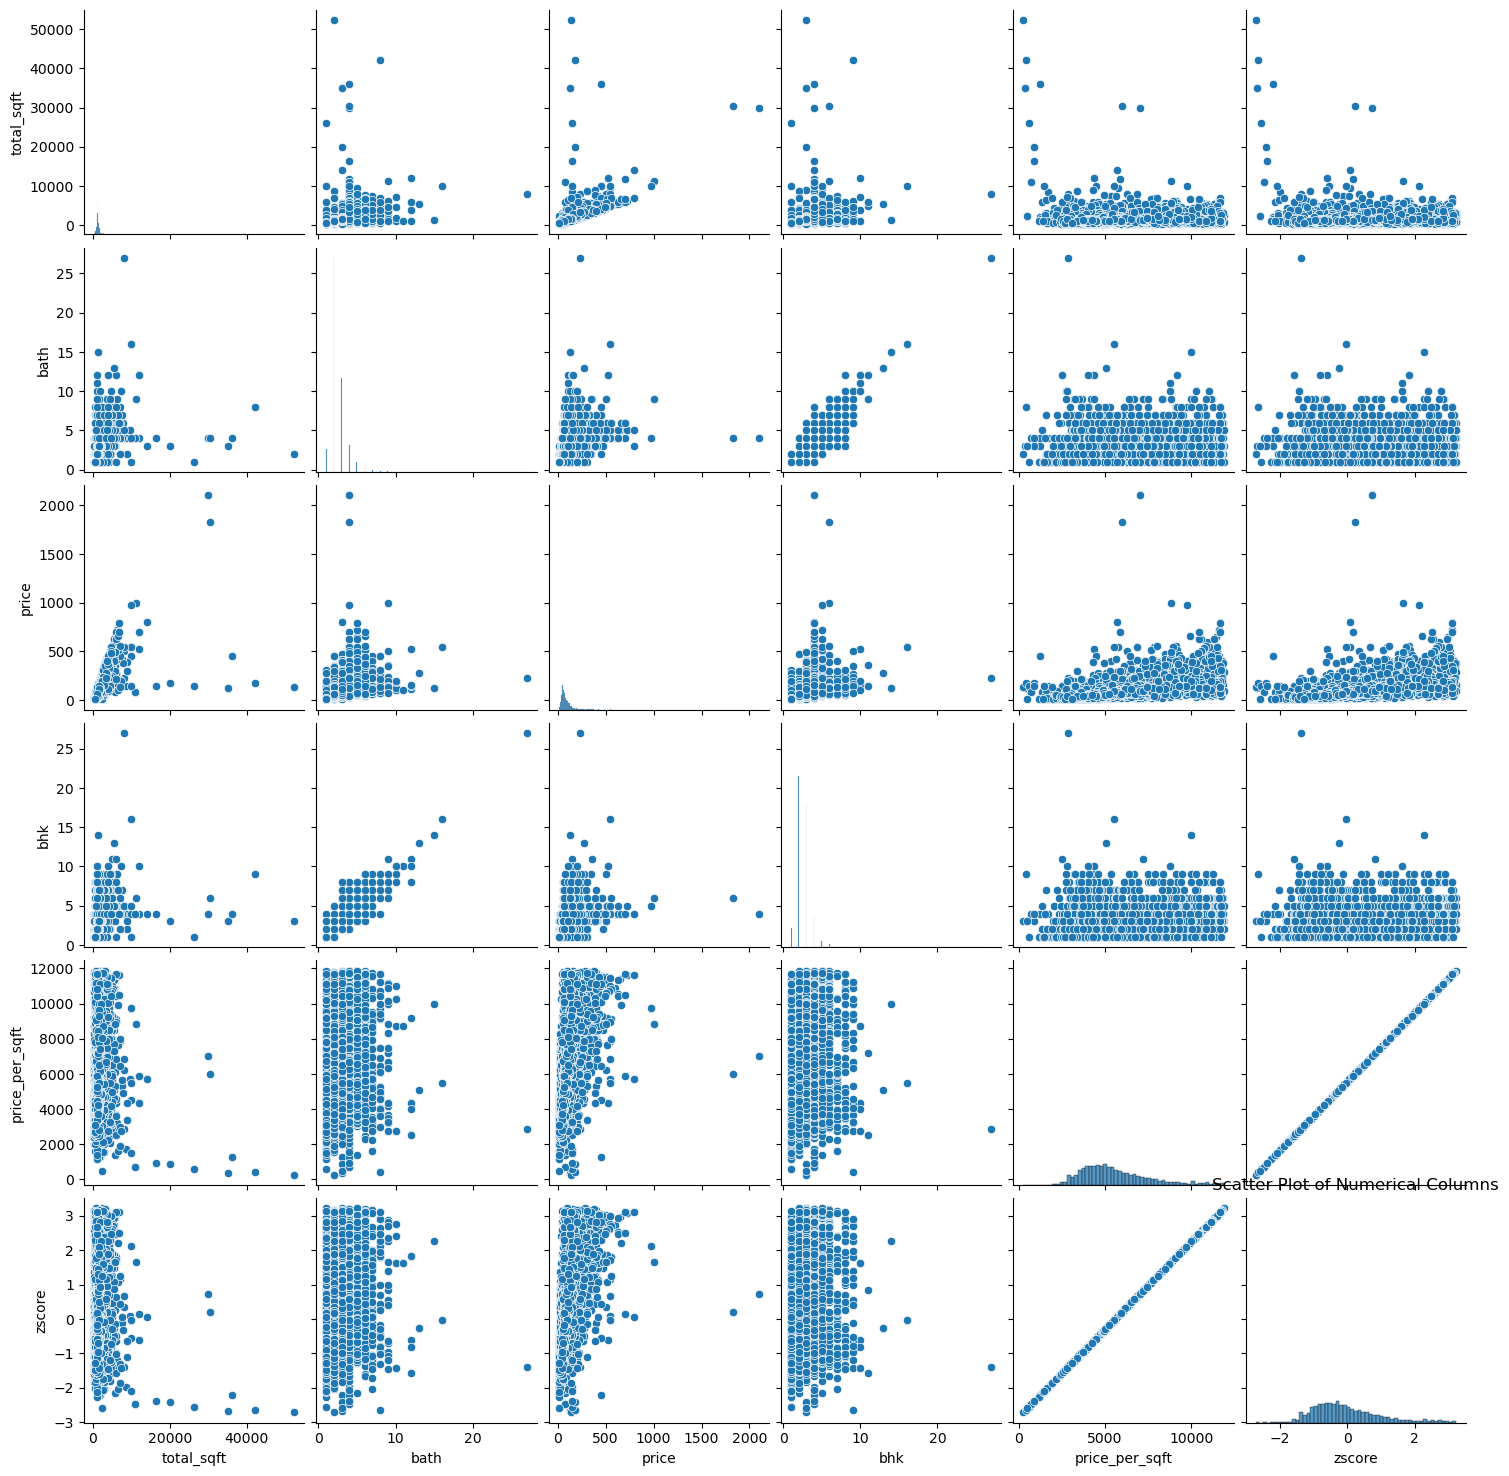

In [20]:
# Scatter plot between variables to check correlation
sns.pairplot(df.select_dtypes(include='number'))
plt.title('Scatter Plot of Numerical Columns')
plt.show()

In [21]:
from scipy import stats
df['zscore'] = stats.zscore(df['price_per_sqft'])
df['zscore']

C:\Users\ACER\AppData\Local\Temp\ipykernel_13548\799769230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zscore'] = stats.zscore(df['price_per_sqft'])


0       -0.958741
1       -0.490845
2       -0.649194
3        0.341766
4       -0.677288
           ...   
13195    0.568563
13196    2.827339
13197   -0.162398
13198    2.467733
13199   -1.269821
Name: zscore, Length: 11935, dtype: float64